In [1]:
import sys
sys.path.insert(1, r'C:\Users\thanh\OneDrive - University of Texas at San Antonio\Pyplume')
import pyplume as pl

import matplotlib.pyplot as plt
import inspect
import numpy as np
import os
import time
T = pl.loadmat(r"D:\nbl.co2.h.2.5\a.wrfoutnpy\T_1.mat")
Q = pl.loadmat(r"D:\nbl.co2.h.2.5\a.wrfoutnpy\QPLUME_1.mat")
# T = pl.loadmat(r"T:\Thanh\SO2_h1pt0\SO2_T")

In [2]:
T = T[:,:,:,:500]
Q = Q[:,:,:,:500]

In [3]:
def filmax(data):
    for i in range(0,np.size(data)):
        if data[i] == np.max(data):
            data = data[:i]
            return data
        
def plumeheight(data,threshold,dt,dz,D):
    nx,ny,nz,nt = np.shape(data)
    data = data/np.max(data)
    data[data<threshold] = 0
    data = np.sum(data,0);data = np.sum(data,0)
    plheight = np.zeros(nt)
    for i in range(nt):
        for j in range (nz):
            if data[j,i] > 1:
                plheight[i]=j*dz;
    plheight = filmax(plheight);plheight = np.array(plheight)
    return plheight
        
def plumevol(data,threshold,dx,dy,dz):
    data = data/np.max(data)
    data[data<threshold] = 0
#     data[data>=threshold] = 1
    vol = np.zeros(np.shape(data)[3])
    for i in range(np.shape(data)[3]):
        vol[i] = np.sum(data[:,:,:,i])*dx*dy*dz
    return vol

def gprimeRho(Q,density_gas,density_air,g):
    gp = g*(density_air - density_gas)/density_air;
    Q = -Q*gp
    return Q

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [4]:
gRho = gprimeRho(Q,1.98,1.25,9.81)
gT = pl.gprimeT(T,300,9.81)

In [5]:
nx,ny,nz,nt = np.shape(gRho)
print(np.shape(gRho))

(45, 45, 700, 500)


In [6]:
dx = 40
dy = 40
dz = 10
dt = 5
D = 400
threshold = 0.001
Ta = 300
g = 9.81
rho_ref = 1.98
rho_amb = 1.25
start = 1

In [7]:
height = plumeheight(gRho,threshold,dt,dz,D)
uf = pl.frontvelocity(height,dt)
uf=uf[start:]
uf = smooth(uf,25)

Text(0.5, 0, 'Time')

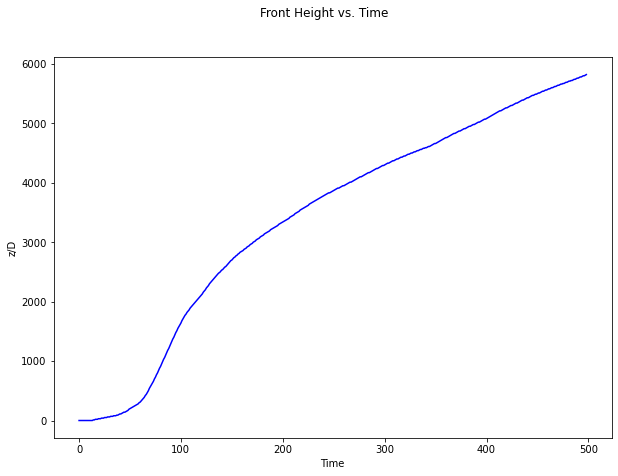

In [8]:
fig, (ax1) = plt.subplots(1,1,figsize=(10,7))
ax1.plot(height,label='CH4.h.0.5',c='b')
fig.suptitle('Front Height vs. Time')
ax1.set_ylabel('z/D');ax1.set_xlabel('Time')

Text(0.5, 0, 'Time')

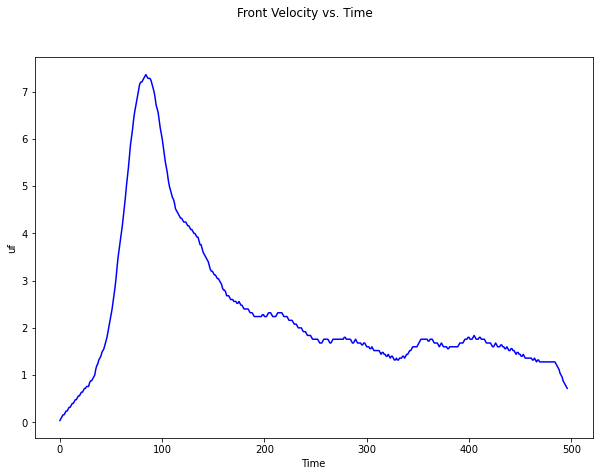

In [9]:
fig, (ax) = plt.subplots(1,1,figsize=(10,7))

ax.plot(uf,label='CH4.h.0.5',c='b')
fig.suptitle('Front Velocity vs. Time')
ax.set_ylabel('uf');ax.set_xlabel('Time')
# plt.savefig('Front Velocity vs. Time' +'.png')

In [10]:
vol = plumevol(gRho,threshold,dx,dy,dz)
vol = vol[start:np.shape(uf)[0]+start]

Text(0.5, 0, 'Time')

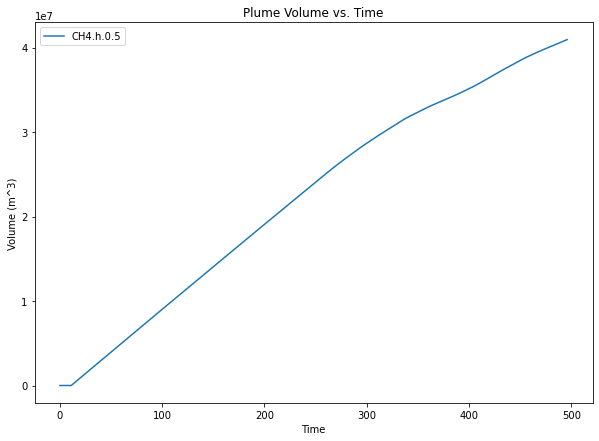

In [11]:
plt.figure(figsize=(10,7))
x = list(range(0,(nt)*dt,dt))
plt.plot(vol,label='CH4.h.0.5')
plt.legend()
plt.title('Plume Volume vs. Time')
plt.ylabel('Volume (m^3)');plt.xlabel('Time')
# plt.savefig('Volume vs. Time' +'.png')

In [12]:
dvol = np.gradient(vol)
# dvol = smooth(dvol,15)

Text(0.5, 0, 'Time')

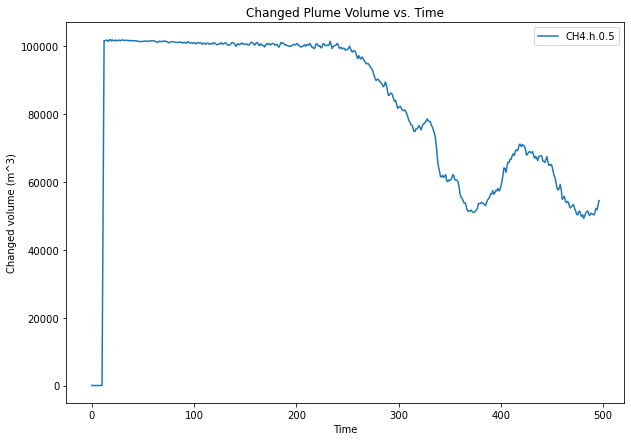

In [13]:
plt.figure(figsize=(10,7))
x = list(range(0,(nt)*dt,dt))
plt.plot(dvol,label='CH4.h.0.5')
plt.legend()
plt.title('Changed Plume Volume vs. Time')
plt.ylabel('Changed volume (m^3)');plt.xlabel('Time')
# plt.savefig('Changed Volume vs. Time' +'.png')

In [14]:
E = (dvol)/((uf*dt)*(np.pi)*(D/2)**2)

Text(0.5, 0, 'Time')

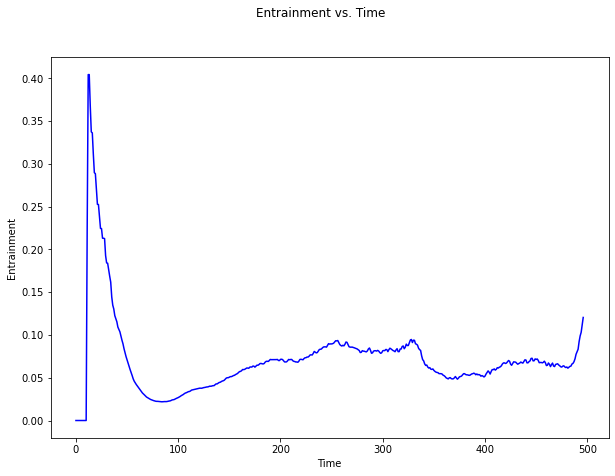

In [15]:
fig, (ax1) = plt.subplots(1,1,figsize=(10,7))

ax1.plot(E,label='CH4.h.0.5',c='b')
fig.suptitle('Entrainment vs. Time')
ax1.set_ylabel('Entrainment');ax1.set_xlabel('Time')

# plt.savefig('Entrainment vs. Time' +'.png')

In [150]:
def frontvelocityplot(data,dataname,dt=10,marksize=250):
    plt.figure(figsize=(10,5))
    color = 'k'
    nt = np.shape(data)[0]
    x = list(range(0,(nt)*dt,dt))
    plt.plot(x[0:np.shape(data)[0]],data,color = color)
    plt.locator_params(axis='x', nbins=300)
    plt.grid()
    plt.xticks(np.arange(min(x), max(x)+1, marksize))
    plt.ylabel('Entrainment');plt.xlabel('Time')
#     plt.savefig(dataname +' Front Velocity.png')

In [44]:
# def hf_contour(data,dx,dz,D,threshold,title):
#     import numpy as np
#     import matplotlib.pyplot as plt
#     data = data.T
#     nz,nx = np.shape(data)
# #     data[data<threshold]=np.nan
#     plt.style.use('seaborn-white')
#     xi = np.linspace(-nx*.5*dx/D, nx*.5*dx/D, nx)
#     zi = np.linspace(0, nz*dz/D, nz)
#     plt.figure(figsize=(10, 10))
# #     contours  = plt.contour(xi,zi,interface, colors='black');
# #     plt.clabel(contours, inline=True, fontsize=15)
#     plt.ylabel("$z/D$",fontsize=14)
#     plt.xlabel("$x/D$", rotation=0, fontsize=14, labelpad=10)
#     plt.title(title,fontsize=18,pad = 20)
#     plt.imshow(data, extent=[-nx*.5*dx/D, nx*.5*dx/D,0, nz*dz/D], origin='lower',cmap='jet',alpha=1,aspect='auto',vmin=0,vmax=0.01)
#     plt.colorbar()
    
# time = 100
# for t in range (100,300,1):
#     testdata = gT[:,22,:,t]
#     hf_contour(testdata,dx,dz,D,threshold,"CH4 plume "+str(t))